<a href="https://colab.research.google.com/github/esankhan/HandWritten-Digit-Recognition/blob/master/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**<br> In this project, We are going to build a Deep Neural Network Model to recognize handwritten digits.This model use<br>MNIST dataset for training.

In [0]:
# Importing required Python libraries.
from numpy import random
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Flatten, Dropout, Activation,Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras import backend as keras_backend
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time 
import cv2



Using TensorFlow backend.


In [0]:
#Loading dataset
from keras.datasets import  mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
#Split
print("No of samples in training set are: {}".format(X_train.shape[0]))
print("No of Samples in test set are: {}".format(X_test.shape[0]))
print('\n')

#Image rows and columns
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
#No of classes
no_classes = 10

print("No of rows in images are: {}".format(img_rows))
print("No of columns in images are: ",format(img_cols))

No of samples in training set are: 60000
No of Samples in test set are: 10000


No of rows in images are: 28
No of columns in images are:  28


**Visualising the Image**

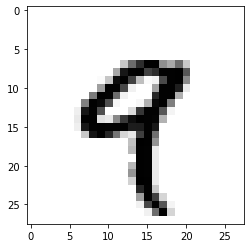

In [0]:
plt.imshow(X_train[4],cmap=cm.binary)

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
#Maping the values of 0-255(because MNIST dataset has greyscale images) to 0-1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
input_shape = (img_rows,img_cols,1)

In [0]:
#Converting the target labels y_train and y_test into binary format so that
# nueral network can perform mapping from input to output
y_train = np_utils.to_categorical(y_train,no_classes)
y_test = np_utils.to_categorical(y_test,no_classes)

print("Binary form ",y_test,y_train)

Binary form  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


**Implementing DNN**

In [0]:
#Building the model 
def simple_model(input_shape,kernel_size,pool_size):
    model = Sequential()
    model.add(Convolution2D(32,
                            kernel_size[0],
                            padding='valid',
                            input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(no_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    return model



In [0]:
pool_size = (2,2)
kernel_size = (3,3)

# Build the model
simple_dnn_model = simple_model(input_shape,kernel_size,pool_size)

#Model Summary
simple_dnn_model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)         

In [0]:
#Training the model

start = time.time()

simple_dnn_model.fit(x=X_train,y=y_train,batch_size=128,epochs=15,verbose=1,validation_data=(X_test,y_test))

end = time.time();
elapsed = (end-start)/60

print("training completed took {} mins".format(elapsed))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 17s 288us/step - loss: 0.8899 - acc: 0.7881 - val_loss: 0.3602 - val_acc: 0.8985
Epoch 2/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.3347 - acc: 0.9047 - val_loss: 0.2834 - val_acc: 0.9205
Epoch 3/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2807 - acc: 0.9183 - val_loss: 0.2501 - val_acc: 0.9300
Epoch 4/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2476 - acc: 0.9282 - val_loss: 0.2221 - val_acc: 0.9366
Epoch 5/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.2226 - acc: 0.9350 - val_loss: 0.2012 - val_acc: 0.9409
Epoch 6/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.2033 - acc: 0.9401 - val_loss: 0.1857 - val_acc: 0.9459
Epoch 7/15
60000/60000 [

In [0]:
#Evaluating the model
score = simple_dnn_model.evaluate(x=X_test,y=y_test,verbose=0)
print("total loss is {}".format(score[0]))
print("total accuracy is {}".format(score[1]))

total loss is 0.11259113527983428
total accuracy is 0.9669


**Building a refined model**

In [0]:
def refined_model(input_shape,kernel_size,pool_size):
    model = Sequential()
    model.add(Convolution2D(32,
                            kernel_size[0],
                            padding='valid',
                            input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Convolution2D(64,kernel_size[0]))
    model.add(MaxPooling2D(pool_size=pool_size))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(no_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [0]:
#Building the refined model
refined_dnn_model = refined_model(input_shape,kernel_size,pool_size)

refined_dnn_model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
____

In [0]:
#Training new model

start = time.time()

refined_dnn_model.fit(x=X_train,y=y_train,
                      batch_size=128,epochs=15,
                      verbose=1
                      ,validation_data=(X_test,y_test))

end = time.time()
elapsed = (end-start)/60
print("Total time taken for training is: {}".format(elapsed))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.1638 - acc: 0.9508 - val_loss: 0.0499 - val_acc: 0.9827
Epoch 2/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0481 - acc: 0.9857 - val_loss: 0.0399 - val_acc: 0.9871
Epoch 3/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0301 - acc: 0.9908 - val_loss: 0.0489 - val_acc: 0.9854
Epoch 4/15
60000/60000 [==============================] - 5s 75us/step - loss: 0.0220 - acc: 0.9927 - val_loss: 0.0382 - val_acc: 0.9878
Epoch 5/15
60000/60000 [==============================] - 5s 77us/step - loss: 0.0181 - acc: 0.9941 - val_loss: 0.0378 - val_acc: 0.9884
Epoch 6/15
60000/60000 [==============================] - 5s 76us/step - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0424 - val_acc: 0.9871
Epoch 7/15
60000/60000 [==============================] - 5s 78us/step - loss: 0.0107 - acc: 0.9964 - val_loss: 0.0480 - val_acc

In [0]:
#Evaluating the new  model
score = refined_dnn_model.evaluate(x=X_test,y=y_test,verbose=0)
print("total loss is {}".format(score[0]))
print("total accuracy is {}".format(score[1]))

total loss is 0.05133564437640794
total accuracy is 0.9892


**Importing Images from folder**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os,os.path
imgs = []
path = "/content/drive/My Drive/Colab Notebooks/data/images"
count=0
for f in os.listdir(path):
    imgs.append(cv2.imread(os.path.join(path,f)))
    count+=1
print("Successfully loaded {} images".format(count))

Successfully loaded 11 images


**Preprocessing the images**<br>

In [0]:
X_pred = []

for img in imgs:
    #Converting color image to rgb
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #Inverting black
    invert_gray = 255-gray
    #Resizing the images to 28*28
    resized = cv2.resize(invert_gray,(28,28))
    #Converting the images to 28*28*1 as same as input_shape
    resized = np.asarray(resized)
    resized = resized.reshape(28,28,1)
    resized = resized/255
    X_pred.append(resized)

X_pred = np.asarray(X_pred)
print(X_pred.shape)

(11, 28, 28, 1)


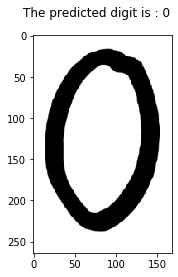

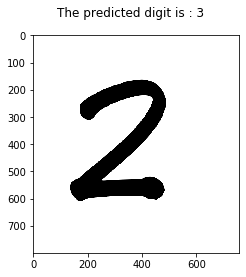

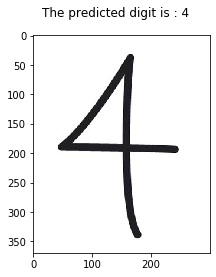

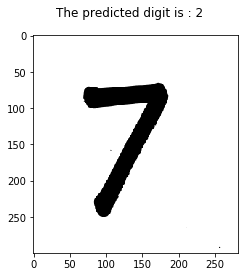

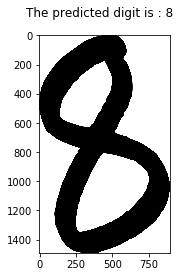

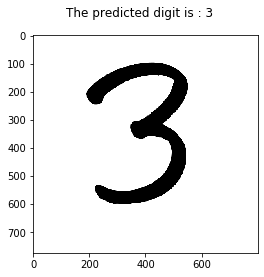

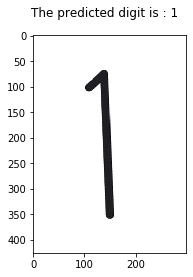

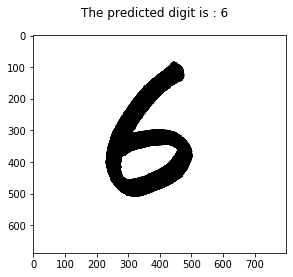

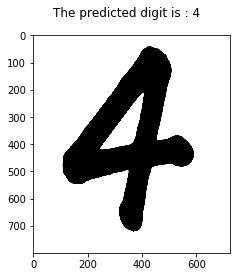

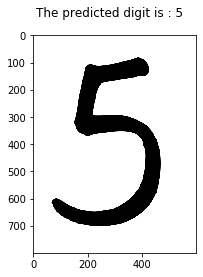

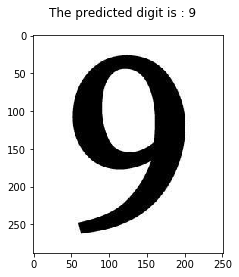

In [0]:
# Predict the output
proba = refined_dnn_model.predict(X_pred)
# Convert the predicted output to respective integer number
answers = proba.argmax(-1)

#plot the image and the predicted number
i=0
for img in imgs:
    plt.figure()
    plt.imshow(img, cmap=cm.binary)
    plt.suptitle("The predicted digit is : " + str(answers[i]))
    i+=1